# Chapter25. Position Concentration Risk

Trading  시 위험을 분산하는 것이 중요. position 을 몇개 asset 으로 집중함으로서, 그 들 asset 의 risk 에 negatively impact 될 수 있다. portfolio 를 다양화하여 전체 risk profile 을 낮출 수 있음을 살펴본다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Intuition

블랙잭에서 card count 를 배웠다고 가정. 물론 걸리면 대부분 카지노에서 쫓겨날 것임. card count 기술은 카지노보다 1% edge 를 준다. [1% edge over the house](https://en.wikipedia.org/wiki/Card_counting). 판돈 \$10,000 로 카지노에 들어간 경우, 한판에 모든 돈을 거는 걸지는 않을 것이다. 51% 의 승률을 가지고 있더라고 여전히 카지노도 49% 의 기회를 가지고 있다. 기대하는 결과는 돈을 따는 것이지만 variance 는 엄청나게 높다. 

이제 당신의 돈를 100 개의 다른 table 위에 놓았다고 가정하자. 이 것은 독립적인 베팅으로 알려져 있다. 왜냐하면 한 table 의 결과가 다른 것에 영향을 주지 않기 때문이다. 이제 variance 는 베팅을 거듭할 수록 줄어든다. 여전히 51% 의 table 에서 이길 것을 기대하지만 돈을 잃을 확률은 크게 줄어든다.

### Simulating Blackjack Games

각 game 의 승률은 51% 이다. 이것을 game 수행 횟수와 각 시행에서 성공할 확률을 parameter 로 하는 binomial distribution (이항분포) 을 이용하여 simulation 할 수 있다.

우선 카지노에 들어가 한번의 게임을 하는 1000 개의 다른 모집단을 simulation 한다.

np.random.binomial :  Draw samples from a binomial distribution.

In [9]:
universes = 1000

results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 1, p=0.51)

In [10]:
results[:3]

array([[1.],
       [0.],
       [0.]])

results 의 mean 과 std 를 check 하자. 다수의 0 과 다수의 1 이 있고 중간에 아무 것도 없으므로 표준편차는 매우 크다. 이 말은 이기고 질 확률이 반반이란 뜻으로 각 casino 에서 한 게임만 하므로 1 % 의 우위(edge) 가 작동할 시간이 부족하다.

In [11]:
np.mean(results), np.std(results)

(0.52, 0.49959983987187184)

이번에는 카지노에 들어가 100 game 을 하는 1000 개의 모집단을 simulate 해 보자.

In [12]:
universes = 1000

results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 100, p=0.51)

np.mean(results), np.std(results)

(51.264, 5.048)

이번에는 작은 표준편차로 51 game 승리에 가까운 결과를 볼 수 있다. 기대 우위(edge) 가 1 game 인데 std 가 여러 game 이므로, 여전히 안전하지는 않아 보인다. 이 것은 이기는 것 보다 더 많이 잃을 수 있음을 보여준다. 이제 10,000 game 으로 늘려보자.

In [13]:
universes = 1000

results = np.zeros((universes, 1))
for i in range(universes):
    results[i] = np.random.binomial(n = 10000, p=0.51)

np.mean(results), np.std(results)

(5096.295, 49.806244337432226)

이 경우 기대 우위가 100 game 이므로 훨씬 안전해 보인다.

NOTE: 위의 simulation 은 data 가  normal distribution 라고 가정한 것이므로 normal 하지 않은 경우에 standard deviation 을 사용하는 것은 맞지 않음을 주의한다. 

There is a subtlety that it's not always valid to use a standard deviation, as the underlying distribution of data in this case is not normal. We use it here because standard deviation is the metric of volatility used in finance, and it still reflects how much 'spread' exists in the data. Be careful not to abuse standard deviation in practice by assuming the underlying data is normal.

## 포트폴리오 이론으로 확장

동일한 원리가 포트폴리오 이론에도 존재한다. 상승 혹은 하락할 주식을 골라서 시장에 대해 우위에 있다고 생각할 경우, 가능한 많은 독립적 betting 을 해야 한다. 이 것은 상관관계가 없는 가능한 많은 자산들에 투자하여 이룰 수 있다.  

finance 에서 volatility 는 time series 의 standard deviation 으로 측정되고, portfolio 의 미래 risk 정도는 과거 portfolio volatility 에 의해 추정됨을 기억하라.

#### 사례 1: 소수 Asset 에 투자

Let's simulate some assets by sampling from a normal distribution.

NOTE: In practice real financial asset returns rarely are normally distributed, so this is not a great assumption. However it's okay here to get our point across because we are just concerned with correlation and level of volaility.

np.cumprod : return the cumulative product of elements along a given axis.

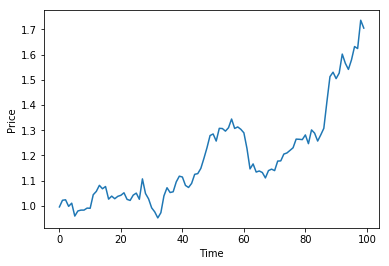

In [16]:
R_1 = np.random.normal(1.01, 0.03, 100)
A_1 = np.cumprod(R_1)
P = A_1
plt.plot(P)
plt.xlabel('Time')
plt.ylabel('Price');

이 경우, portfolio 에 한 asset 밖에 없으므로 asset 의 volatility 에 완전히 노출되어 있다. 

#### 살례 2: 다수의 Correlated Assets 에 투자

In this case we expand our asset pool, but there is still a large amount of pairwise correlation between the returns. We simulate this by simulating assets 2 through N as asset 1 plus some noise.

Individual Asset Volatilities :  [0.030524142028449382, 0.03205879730166251, 0.030936111988771213, 0.032514807877693064, 0.030894783539897885, 0.03235370351160785, 0.032580755908763345, 0.0326479587964448, 0.03201850347968686, 0.032309543648920004]

Mean Asset Volatility :  0.03188391080818969

Portfolio Volatility :  0.030666313679288335



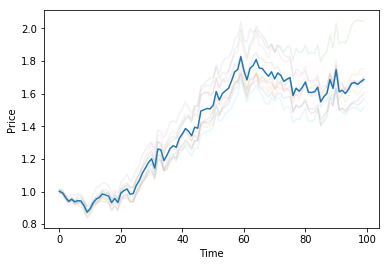

In [42]:
N = 10

returns = np.zeros((N, 100))
assets = np.zeros((N, 100))

R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)
plt.plot(assets[0], alpha=0.1)

for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.01, 100)   # R_1 에 correlate 되도록 R_i 구성
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha=0.1)

R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)
plt.plot(P)
plt.xlabel('Time')
plt.ylabel('Price');

print('Individual Asset Volatilities : ', [np.std(R) for R in returns])
print()
print('Mean Asset Volatility : ', np.mean([np.std(R) for R in returns]))
print()
print('Portfolio Volatility : ', np.std(R_P))
print()

Here you can see the portfolio accompanied by all the assets, the assets being drawn much softer. The important thing to note is that the portfolio undergoes all the same shocks as the assets, because when one asset is up or down, all the others are likely to be so as well. This is the problem with correlated assets. Let's take a look at the volatility of the assets and the volatility of the portfolio.

The mean volatility of our assets is the same as the portfolio volatility. We haven't gained anything by making more bets. You can think of correlated bets as identical to the original bet. If the outcome of the second bet is correlated with the first, then really you've just made the same bet twice and you haven't reduced your volatility.

#### 사례 3: 다수의 Uncorrelated Assets 에 투자

In this case we independently generate a bunch of assets an construct a portfolio that combines all of them.

Individual Asset Volatilities :  [0.03273293332621772, 0.03140736185508475, 0.029620659663520402, 0.029444421887715327, 0.02993160911461357, 0.029766691410578645, 0.028830113664085225, 0.029555431318994237, 0.03334393152775104, 0.02875580606486483]

Mean Asset Volatility :  0.03033889598334257

Portfolio Volatility :  0.009637017055041367



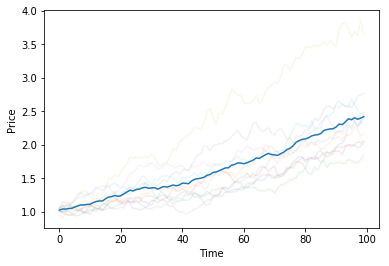

In [43]:
N = 10

assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

for i in range(N):
    R_i = np.random.normal(1.01, 0.03, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha=0.1)

R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)
plt.plot(P)
plt.xlabel('Time')
plt.ylabel('Price');

print('Individual Asset Volatilities : ', [np.std(R) for R in returns])
print()
print('Mean Asset Volatility : ', np.mean([np.std(R) for R in returns]))
print()
print('Portfolio Volatility : ', np.std(R_P))
print()

Now we see the benefits of diversification. Holding more uncorrelated assets smooths out our portfolio. When one is down, the others are no more likely to be down, so the bumps both upwards and downwards are often much smaller. The more assets we hold, the more we'll reduce our volatility as well. Let's check that.

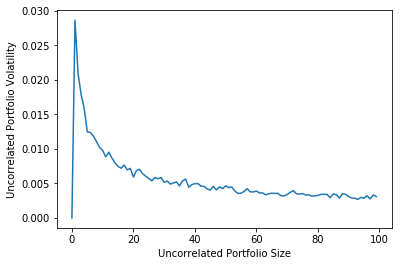

In [41]:
portfolio_volatilities_by_size = np.zeros((100,1))

for N in range(1,100):

    assets = np.zeros((N, 100))
    returns = np.zeros((N, 100))

    for i in range(N):
        R_i = np.random.normal(1.01, 0.03, 100)
        returns[i] = R_i

    R_P = np.mean(returns, axis=0)

    portfolio_volatilities_by_size[N] = np.std(R_P)
    
plt.plot(portfolio_volatilities_by_size)
plt.xlabel('Uncorrelated Portfolio Size')
plt.ylabel('Uncorrelated Portfolio Volatility');

위에서 보듯 100 개까지는 아니더라도 20 개 정도의 uncorrelated asset 으로 portfolio 를 만들면 volatility 를 충분히 낮출 수 있다.

## Final Point

Be invested in as many uncorrelated assets as possible. In finance this is known as diversification. If you have a pricing model, price everything and invest accordingly. This concept is explained in the Long-Short Equity Lecture.

### Capital Constraints

Because of transaction costs, you need to have certain minimum amounts of capital to invest in large numbers of assets. Therefore sometimes you are unable to invest in hundreds or thousands. In this case you should still try to maximize your portfolio size, keeping in mind that if you have a portfolio of size 20, you can still find 20 relatively uncorrelated assets and that's better than nothing.

## 위 그래프를 수학적으로 표현

risk 는 volatility 이고 asset 의  volatility 는 standard deviation 으로 표시할 수 있음. 

두개의 asset 으로 구성된 경우, $S_1$ and $S_2$, with weights $\omega_1$ and $\omega_2$ such that $\omega_1 + \omega_2 = 1$. Call the portfolio $P$ and say that $S_1$ and $S_2$ have mean and standard deviation $\mu_1, \sigma_1$ and $\mu_2, \sigma_2$ respectively. We can calculate the value of $P$ easily.

$$ P = \omega_1 S_1 + \omega_2 S_2 $$

$\mu_P$ 를 portfolio $P$ 의 return 이라고 하자. portfolio 의 expected return 은 다음과 같이 계산할 수 있다. 

$$ E[\mu_P] = E[\omega_1 \mu_1 + \omega_2 \mu_2] = \omega_1 E[\mu_1] + \omega_2 E[\mu_2] $$

마찬가지로 overall risk of the portfolio 를 $\sigma_p$ 라 하자.  우선 portfolio 의 variance 를 계산한다. $\sigma_p^2 = VAR[P]$ 라고 하고, $S_1$ 과 $S_2$ 의 correlation 을 $COR[S_1,S_2] = \frac{COV[S_1,S_2]}{\sigma_1\sigma_2} = \rho_{12}$ 라고 하면 계산은 다음과 같다.

\begin{eqnarray}
\sigma_p^2 &=& VAR[P] \\
    &=& VAR[\omega_1 S_1 + \omega_2 S_2] \\
    &=& VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + COV[\omega_1 S_1,\omega_2 S_2] \\
    &=& \omega_1^2 VAR[S_1] + \omega_2^2 VAR[S_2] + 2\omega_1\omega_2 COV[S_1,S_2] \\
    &=& \omega_1^2 \sigma_1^2 + \omega_2^2 \sigma_2^2 + 2\rho_{12}\omega_1\omega_2\sigma_1\sigma_2
\end{eqnarray}

In [59]:
stocks = np.array([100, 75])         # s1, s2 의 value 가 각각 100, 75 라 가정
mean_returns = np.array([4, 6])   # s1, s2 의 mean return 이 각각 4 와 6 이라 가정

r_12 = 0.20           # COR[S1,S2] s1 과 s2 의 correlation
cov_12 = r_12 * 0.05 * 0.08                # covariance of two assets. s1, s2 의 std 가 각각 0.05, 0.08 이라 가정
covariance_matrix = np.array([[0.05**2,cov_12],[cov_12,0.08**2]])   # s1, s2 의 covariance matrix 는 오른쪽의 2 x 2 matrix 임

weights = np.array([0.7, 0.3])      # s1, s2, weight 가 각각 0.7, 0.3 이라 가정

P = np.dot(weights, stocks.T)     # weight x stock values

In [60]:
covariance_matrix

array([[0.0025, 0.0008],
       [0.0008, 0.0064]])

porfolio 의 overall risk 계산 :

In [61]:
var_p = np.dot(np.dot(weights, covariance_matrix), weights.T)
sigma_p = np.sqrt(var_p)
print("The overall risk of the portfolio is: ", sigma_p)

The overall risk of the portfolio is:  0.04622769732530488


volatility 가 0.05 와 0.08 인 두개의 asset 으로 portfolio 를 구성하니 risk 가 0.046 으로 줄었다. asset 을 더 추가하면 개별 asset 에 대한 risk 노출을 더 줄일 수 있다.

In [62]:
P     # portfolio value

92.5

In [63]:
np.dot(weights, mean_returns.T)      #  portfolio 의 mean return

4.6

## Benefits Of Additional Bets

위의 결과를 n 개의 asset 으로 확장. asset 이 추가될 수록 overall risk 는 낮아짐. 다음은 n 개의 asset 으로 구성된 portfolio variance 의 일반식.

$$ \sigma_p^2 = \sum_i \omega_i^2 \sigma_i^2 + \sum_i\sum_{j\neq i} \omega_i\omega_j\sigma_i\sigma_j\rho_{ij}, \ i, j \in \lbrace 1,\ldots, n\rbrace $$

asset 들이 서로 독립적(uncorrelated, i.e. $\rho_{ij}=0$) 일 수록 효과가 커진다. asset 간의 correlations 이 클 수록 비교할만한 금액의 더 많은 asset 을 포함시켜야 risk 를 줄일 수 있다.

아래에서 4 개의 주식으로 이루어진 portfolio 를 살펴보자.

In [64]:
stocks = np.array([230, 176, 192, 105])            # 각 주식의 가격
mean_returns = np.array([2.0, 3.5, 7.5, 5.0])    # 각 주식의 mean_return
std_dev = np.array([0.05, 0.07, 0.11, 0.09])     # 각 주식의 std
weights = np.array([0.35, 0.30, 0.15, 0.20])     # 각 주식의 weight


r_12 = 0.2        # 각 stock 간의 서로 다른 correlation (모든 combination)
r_13 = 0.08
r_14 = 0.1
r_23 = 0.6
r_24 = 0.4
r_34 = 0.8
covariance_matrix = np.array([[0.05**2, r_12 * 0.05 * 0.07, r_13 * 0.05 * 0.11, r_14 * 0.05 * 0.09],
                             [r_12 * 0.05 * 0.07, 0.07**2, r_23 * 0.07 * 0.11, r_24 * 0.07 * 0.09],
                             [r_13 * 0.05 * 0.11, r_23 * 0.07 * 0.11, 0.11**2, r_34 * 0.11 * 0.09],
                             [r_14 * 0.05 * 0.09, r_24 * 0.07 * 0.09, r_34 * 0.11 * 0.09, 0.09**2]])


In [66]:
covariance_matrix           # diagonal 은 std_dev 의 sqaure

array([[0.0025 , 0.0007 , 0.00044, 0.00045],
       [0.0007 , 0.0049 , 0.00462, 0.00252],
       [0.00044, 0.00462, 0.0121 , 0.00792],
       [0.00045, 0.00252, 0.00792, 0.0081 ]])

In [67]:
var_p = np.dot(np.dot(weights, covariance_matrix), weights.T)        # portfolio 의 variance
sigma_p = np.sqrt(var_p)
print("The overall risk of the portfolio is: ", sigma_p)

The overall risk of the portfolio is:  0.052849787132967715


4 종류 asset 의 개별 risk 보다 portfolio 의 risk 가 낮아짐

이번에는 4 개 asset 간의 correlation 이 $0$ 라고 가정하고 전과 동일한 계산을 하면,

In [68]:
covariance_matrix = np.array([[0.05**2, 0, 0, 0],
                                              [0, 0.07**2, 0, 0],
                                              [0, 0, 0.11**2, 0],
                                              [0, 0, 0, 0.09**2]])
var_p = np.dot(np.dot(weights, covariance_matrix), weights.T).flatten()
sigma_p = np.sqrt(var_p)
print("The overall risk of the portfolio is: ", sigma_p)

The overall risk of the portfolio is:  [0.03665379]


모든 개별 주식보다 portfolio 의 volatility 가 훨씬 낮아졌다. 따라서, 단순히 상호 독립적인 주식 종목을 선택하기만 해도 portfolio 의 overall risk 를 크게 낮출 수 있다. 물론 correlated 된 asset 을 추가하여 낮출 수도 있지만 같은 효과를 얻으려면 훨씬 많는 asset 을 추가해야 한다.

다음 함수는 임의 길이의 randomly generate 된 portfolio 를 구해준다.
The following function will allow you to randomly generate a portfolio of arbitrary length:

In [69]:
# Generate an almost entirely random portfolio
# Only constraint is that an asset's variance
def generate_portfolio(n = 5):                      # default : 5 assets
    assets = np.random.normal(100, 20, n)    # randomy generate assets
    weights = np.random.uniform(0, 1, n)
    weights = weights/sum(weights)
    returns = np.random.normal(5, 2, n) # Say that 5 is the average return for our assets
    # Generate covariance matrix for assets
    cov_matrix = np.ndarray(shape = (n, n))
    std_dev = np.zeros(n)
    for i in range(n):
        for j in range(i + 1):
            if j == i:
                std_dev[i] = returns[i]/100
                cov_matrix[i][j] = std_dev[i]**2
            else:
                cov_matrix[i][j] = np.random.uniform(-1, 1)
                cov_matrix[j][i] = cov_matrix[i][j]
    # Ensures that the covariance matrix is symmetric
    # Serves the double purpose of squaring the volatility (already present in the matrix) so we get variance
    return weights, assets, returns, std_dev, cov_matrix

We can now use this function to randomly generate a set of assets, each with a different return, as well as a covariance matrix of the assets.

In [72]:
w, S, mu, sigma, cov = generate_portfolio(6)
print("Weights:\n", w)
print("Assets:\n", S)
print("Returns:\n", mu)
print("Volatilities:\n", sigma)
print("\nCovariance Matrix:\n", cov)

Weights:
 [0.16662155 0.02027912 0.30779651 0.04465208 0.29106895 0.16958178]
Assets:
 [ 90.08122662 119.90140949 113.49251224  59.02992247  88.81827558
  96.13103853]
Returns:
 [1.53638392 7.31015235 5.33886474 3.03793958 7.56522216 3.49437952]
Volatilities:
 [0.01536384 0.07310152 0.05338865 0.0303794  0.07565222 0.0349438 ]

Covariance Matrix:
 [[ 2.36047554e-04 -4.97291519e-02 -2.80654738e-02  8.89914821e-01
   8.85764870e-01 -5.12267235e-01]
 [-4.97291519e-02  5.34383274e-03  7.59082808e-01 -6.93719252e-02
  -1.71764467e-01  7.54394123e-01]
 [-2.80654738e-02  7.59082808e-01  2.85034767e-03  3.41538885e-01
   2.98273093e-02 -9.43680664e-01]
 [ 8.89914821e-01 -6.93719252e-02  3.41538885e-01  9.22907688e-04
   1.36991676e-01 -9.94996865e-01]
 [ 8.85764870e-01 -1.71764467e-01  2.98273093e-02  1.36991676e-01
   5.72325864e-03  8.81235369e-01]
 [-5.12267235e-01  7.54394123e-01 -9.43680664e-01 -9.94996865e-01
   8.81235369e-01  1.22106883e-03]]


And now we can easily perform the same calculations that we did before to determine overall portfolio value and risk.

In [73]:
P = np.dot(w, S)
var_p = np.dot(np.dot(w, cov), w.T)
sigma_p = np.sqrt(var_p)
print("Portfolio Value: ", P)
print("Portfolio Volatility: ", sigma_p)

Portfolio Value:  97.16369243345858
Portfolio Volatility:  0.2683518256020411


Keep in mind that if you choose to change this function at all, you must include some failsafe so that higher returns always correspond to higher volatilites. This is one of the core assumptions of portfolio theory and, while not pertinent here due to our arbitrary weight values, it is essential to calculating the weights of an optimal portfolio.